# Get results for vanilla version classifier


In [5]:
# setup 
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# model name
model_name = "vanilla_bert_model"
# load data
val_eval_df = pd.read_csv("../data/v1_classifier_val_results.csv")
test_eval_df = pd.read_csv("../data/v1_classifier_test_results.csv")


In [6]:
# define function to display eval metrics
def get_metrics(true_labels, preds):
    metrics_summary = {}

    acc = accuracy_score(true_labels, preds)
    bal_acc = balanced_accuracy_score(true_labels, preds)

    precision = precision_score(true_labels, preds, average='macro', zero_division=0)
    recall = recall_score(true_labels, preds, average='macro', zero_division=0)
    f1 = f1_score(true_labels, preds, average='macro', zero_division=0)

    label_order = sorted(set(true_labels).union(set(preds)))
    report = classification_report(true_labels, preds, labels=label_order, zero_division=0)
    metrics_summary[model_name] = {
        'acc': acc,
        'bal_acc': bal_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    # print metrics
    print(f"Model: {model_name}")
    print(f"  Accuracy: {acc}")
    print(f"  Balanced Accuracy: {bal_acc}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")
    print(f"  Classification Report:\n{report}")


    # Confusion Matrix
    label_order = sorted(set(true_labels).union(set(preds)))
    cm = confusion_matrix(true_labels, preds, labels=label_order)
    cm_df = pd.DataFrame(cm, index=label_order, columns=label_order)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


    return metrics_summary



Model: vanilla_bert_model
  Accuracy: 0.7168696936138796
  Balanced Accuracy: 0.7059283326370992
  Precision: 0.7217043702778092
  Recall: 0.7059283326370992
  F1-score: 0.7118754672284071
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.94      0.85      0.89       756
     CDU/CSU       0.72      0.81      0.76      1508
         FDP       0.63      0.58      0.60       683
       GRÜNE       0.66      0.55      0.60       771
       LINKE       0.72      0.77      0.75       541
         SPD       0.66      0.68      0.67      1159

    accuracy                           0.72      5418
   macro avg       0.72      0.71      0.71      5418
weighted avg       0.72      0.72      0.72      5418



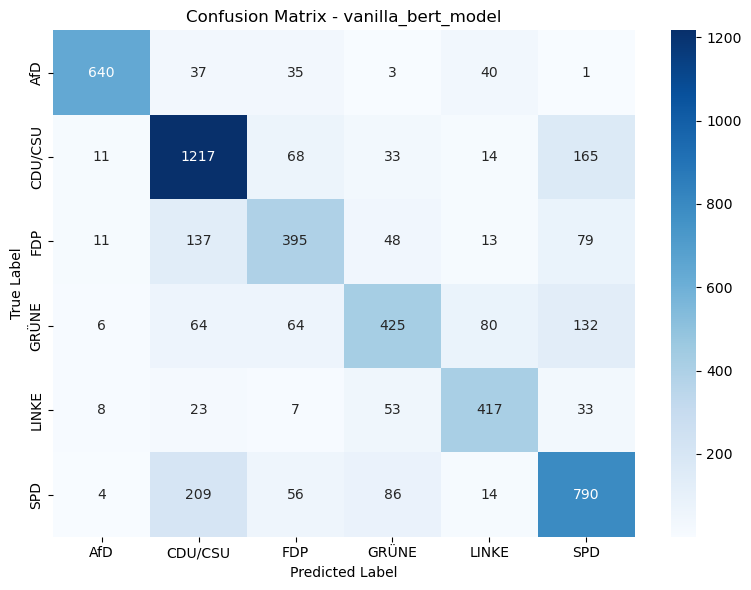

Model: vanilla_bert_model
  Accuracy: 0.7120708748615725
  Balanced Accuracy: 0.7065095110316534
  Precision: 0.7192983025612326
  Recall: 0.7065095110316534
  F1-score: 0.7099151264264133
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.95      0.86      0.90       744
     CDU/CSU       0.71      0.81      0.76      1428
         FDP       0.63      0.59      0.61       706
       GRÜNE       0.66      0.51      0.58       799
       LINKE       0.71      0.80      0.75       534
         SPD       0.65      0.67      0.66      1207

    accuracy                           0.71      5418
   macro avg       0.72      0.71      0.71      5418
weighted avg       0.71      0.71      0.71      5418



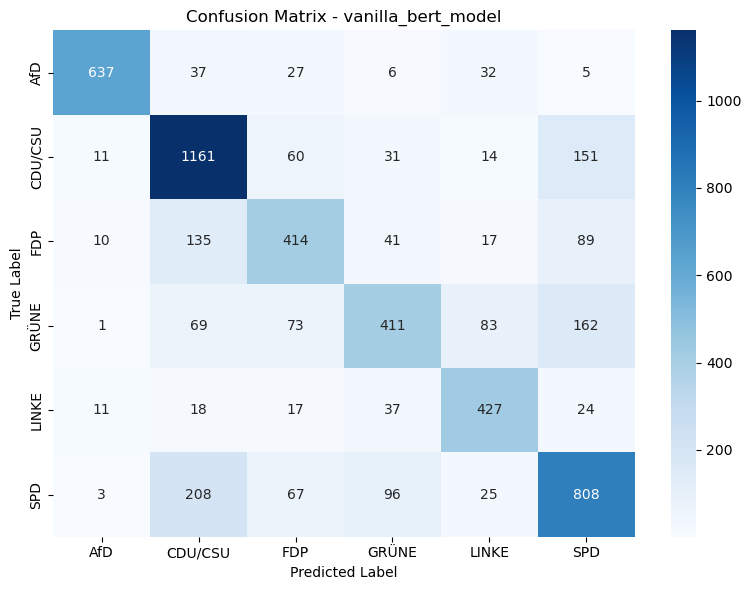

{'vanilla_bert_model': {'acc': 0.7120708748615725,
  'bal_acc': 0.7065095110316534,
  'precision': 0.7192983025612326,
  'recall': 0.7065095110316534,
  'f1': 0.7099151264264133}}

In [7]:
# evaluate
# On validation set
get_metrics(val_eval_df["true_label"], val_eval_df["predicted_label"])

# On test set
get_metrics(test_eval_df["true_label"], test_eval_df["predicted_label"])